<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#0.-Prepare-the-data-and-set-basic-information" data-toc-modified-id="0.-Prepare-the-data-and-set-basic-information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>0. Prepare the data and set basic information</a></span></li><li><span><a href="#1.-Create-a-scStateDynamics-object" data-toc-modified-id="1.-Create-a-scStateDynamics-object-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1. Create a scStateDynamics object</a></span></li><li><span><a href="#2.-Identify-cell-clusters-and-cell-states" data-toc-modified-id="2.-Identify-cell-clusters-and-cell-states-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2. Identify cell clusters and cell states</a></span></li><li><span><a href="#3.-Measure-the-distances-between-cell-states" data-toc-modified-id="3.-Measure-the-distances-between-cell-states-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>3. Measure the distances between cell states</a></span></li><li><span><a href="#4.-Align-the-cell-states-between-two-time-points" data-toc-modified-id="4.-Align-the-cell-states-between-two-time-points-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>4. Align the cell states between two time points</a></span></li><li><span><a href="#5.-Save-the-cell-state-alignment-results" data-toc-modified-id="5.-Save-the-cell-state-alignment-results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>5. Save the cell state alignment results</a></span></li><li><span><a href="#6.-Perform-factor-analysis-on-the-cell-level-expression-changes" data-toc-modified-id="6.-Perform-factor-analysis-on-the-cell-level-expression-changes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>6. Perform factor analysis on the cell-level expression changes</a></span></li></ul></div>

### Introduction

`scStateDynamics` is method to infer the tumor cell state dynamics under drug treatment and dissect the tumor drug response mechanisms by modeling the expression changes.

In this tutroial, we will show the entire `scStateDynamics` pipeline using the simulation dataset 1.

### 0. Prepare the data and set basic information

Firstly, we set the following basic information:
* `run_label`: The name of dataset.
* `pre_name`: The name of the pre-time point scRNA-seq data.
* `pos_name`: The name of the post-time point scRNA-seq data.
* `savePath`: A path to save the analysis results.

The example dataset can be downloaded according to the README in [GitHub](https://github.com/wguo-research/scStateDynamics). 

In [1]:
import os
import scStateDynamics as scd
import scanpy as sc

In [2]:
scd.__version__

'0.0.20'

In [3]:
run_label = "Simulation 1"   # dataset name
pre_name, pos_name = ['Pre', 'Post']   # The name of the pre- and post-timepoint data in the scanpy cell annotation information

dataPath = "./example_data/"
savePath = './example_data/Simulation_1-results/'

if not os.path.exists(savePath):
    os.makedirs(savePath)

In [4]:
adata_comb = sc.read(dataPath + 'Simulation_1-scobj_comb.h5ad')

### 1. Create a scStateDynamics object

The input data of `scStateDynamics` is a combined [`scanpy`](https://scanpy.readthedocs.io/en/stable/) object (`adata_comb`), containing the scRNA-seq data of both pre- and pos-timepoint. 

**Hint:**
* The steps of preprocess, quality control, normalization, feature selection (highly variable genes identification), and dimensionality reduction (principal component analysis, PCA) should be perfromed in advance. 

* The highly variable genes (HVGs) can be set as the union of the HVGs identified in the data of two time points.

* The cell annotation information `adata_comb.obs` should contain a column (input as parameter `key` in the function `createScStateDynamicsObj`) to indicate the time point or condition information. 

* The PCA results should be stored in `adata_comb.varm` with a key name of `X_pca`.

In [5]:
adata_comb

AnnData object with n_obs × n_vars = 4995 × 1988
    obs: 'Cell', 'n_genes', 'n_genes_by_counts', 'total_counts', 'Time'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

This step will create a `scStateDynamics` object `scd_obj`.

In [6]:
scd_obj = scd.createScStateDynamicsObj(
    sc_obj_comb = adata_comb, 
    run_label = run_label, 
    key = 'Time', 
    pre_name = pre_name, pos_name = pos_name, 
    cls_prefixes = ['S', 'T'],   # The prefixes of the cluster labels at pre-timepoint and post-timepoint.
    savePath = savePath
)

### 2. Identify cell clusters and cell states

This step will use the `sc.tl.leiden()` function of `scanpy` to identify cell clusters and cell cliques (also named as metacells or cliques) at pre- and post-timepoint. 

Generally, the resolutions for clusters (`cls_resolutions`) can be set as a small value, while the resolutions (`clq_resolutions`) for cell states (metacells or cliques) can be set as a large value. 

This function will also save the clustering plots (`Cell-PairUMAP.png`) and the text files (`clique-clsLabel_pre.txt` and `clique-clsLabel_pos.txt`) recording the corresponding relationship between the cell state (metacell or clique) identities and cluster identities.


## 1. Identify cell clusters and cell states ---------------------------


/home/glab/wguo/softwares/anaconda3/envs/gwb-r40/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
/home/glab/wguo/softwares/anaconda3/envs/gwb-r40/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(


| - N_cells: [1967, 3028]
| - N_clusters: [3 3]
| - N_cliques: [313 359]
| - Saving figure: ./example_data/Simulation_1-results/Simulation 1_Cell-PairUMAP.png


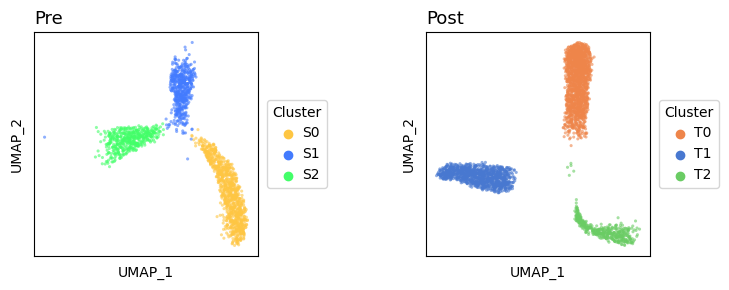

In [7]:
cls_resolutions = [0.2, 0.2]  # Resolutions for identifying cell clusters
clq_resolutions = [30, 30]    # Resolutions for identifying cell states (also named as metacells or cliques)
scd_obj.runClustering(cls_resolutions = cls_resolutions, clq_resolutions = clq_resolutions)

### 3. Measure the distances between cell states

The meaning of parameters are:
* `k`: The k-nearest-neighbor distance $ϵ_k(x)$ will be used as an adaptive bandwidth in Gaussian kernel function.
* `alpha`: The exponent $\alpha$ is introduced to mitigate the heavy tail of Gaussian kernel when $ϵ_k (x)$ is large.
* `step`: The number of random-walk steps to obtain the $t$-step diffusion probability.

In [8]:
k, alpha, step = 5, 10, 5
scd_obj.calcGlobalDist(k = k, alpha = alpha, step = step)


## 2. Measure the distances between cell states ---------------------------


### 4. Align the cell states between two time points

This step will align the cell states by minimizing the overall changes in expression and correct the unreasonable flows iteratively.

**1) Align the cell states between two time point, group the cell-level alignments into cell subcluster flows, and quantify the changes in cell states of each subcluster flow.**


## 3. Align the cell states between two time points ---------------------------


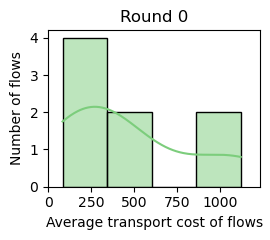

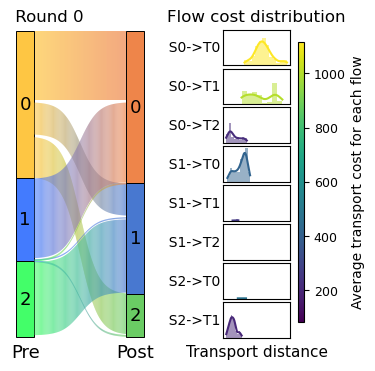

In [9]:
scd_obj.alignCellStates()

* The first plot is a histogram showing the distribution of the flow costs at round 0.

* In the second plot: the left side is a Sankey plot showing the cell subcluster alignments inferred by `scStateDynamics`. The color of the rectangles corresponds to the pre-clusters and post-clusters, while the height of each rectangle indicates the cluster's proportion in all cells. The right side is histogram plots showing the distribution of the transport distances (costs) in all flows, with the color representing the average transport cost of each flow, which can be seen as a quantification of the changes in cell states in this flow.

**2) Identify the types of cell subcluster flows based on the distribution of the changes in cell states of flows.**

According to the distribution of the average transport cost of flows (the first plot above and the right panel of the second plot above), we found the flows S0->T0 and S0->T1 had extremely higher costs than others. Hence, we manually set the threshold as 750 (the red dashed line in the following plot) to define them as unreasonable flows.

| - Current error number: 2


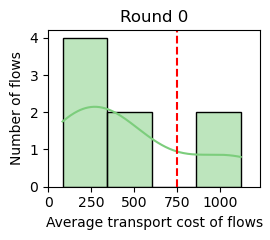

In [10]:
scd_obj.assignFlowType(method = 'Manual', threshold=750)

**3) Correct the unresonable flows and reperform cell state alignments.**


## 4. Correct cluster proliferation or inhibition rates ---------------------------
| Repreforming OT: round  1 ---------


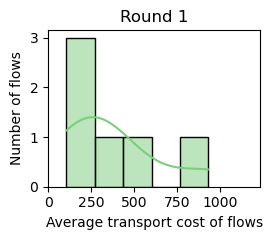

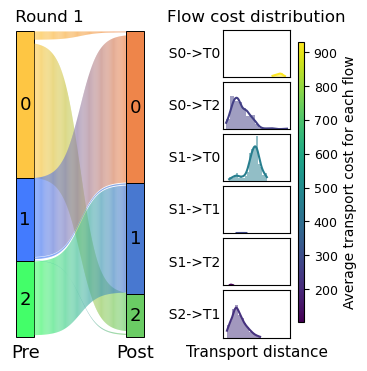

In [11]:
scd_obj.correctGrowthDeath()

**4) Identify the unreasonable flows based on the outlier detection algorithm.**

Similarly, according to the distribution of the average transport cost of flows, we found the flow S0->T0 had extremely higher costs than others, as well as outliers. Hence, we use the outlier detection algorithm to determine the threshold (the red dashed line in the following plot) to define it as an unreasonable flow.

| - Current error number: 1


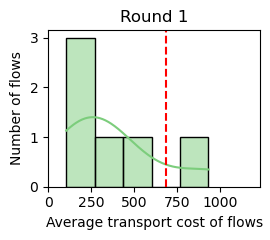

In [12]:
scd_obj.assignFlowType(method = 'Outlier')

**5) Correct the unresonable flows and reperform cell state alignments.**

| Repreforming OT: round  2 ---------


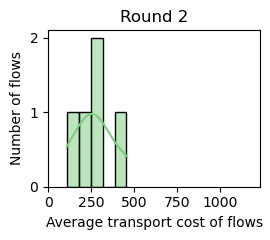

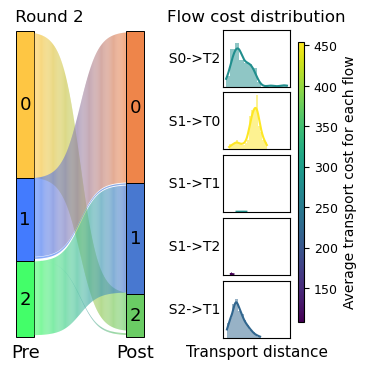

In [13]:
scd_obj.correctGrowthDeath()

Now, the distribution of the changes in cell states of flows is generally unimodal without outliers. Hence, we obtain the final cell alignment relationships and the proliferation or inhibition rates of cell clusters.

The alignment results can be accessed via the function `getAlign_results()`, which can provide the values of `flow_info`, `ot_clq`, `ot_cls`, `grow_rates`, `p_flowCostHist`, and `p_flowSankey` variables at different iteration round (`round_i`). Setting `round_i` as `-1` can obtain the final results (the last iteration round). The meaning the these results can be obtained via `help(scd_obj.getAlign_results)`.

### 5. Save the cell state alignment results

This step will save the cell state alignment results as figure or text files, including
* `Flow-Heatmap.png`: A heatmap showing the cluster alignment matrix.
* `Flow-NormalizedHeatmap.png`: Two heatmaps showing the cluster alignment matrix after row/column normalization.
* `FlowCost-hist.png`: A histogram showing the distribution of cell state changes (flow costs) of cell subcluster flows.
* `GrowthRate-bar.png`: A bar plot showing the estimated proliferation or inhibition rates of clusters.
* `Flow-Sankey.png`: A Sankey plot showing the inferred cell subcluster alignment relationships (subcluster flows), and some histogram plots showing the distribution of the transport distances (costs) in each flow.
* `OT-clq_sparse.txt`: A table recording the alignemnt relationships between cell states (metacells or cliques) and the cluster identity of the source and target cell state.
* `FlowInfo.txt`: the basic information of the finally identified cell subcluster flows. Detailed introduction can be found vi `help(scd_obj.getAlign_results)`.
* `FlowInfo-init.txt`: the basic information of the initially identified cell subcluster flows.
* `GrowthRates.txt`: the estimated proliferation or inhibition rates of cell subcluster flows. Positive value indicates proliferation, while negative value indicates inhibition.
* `scd_object.pkl`: the final `scStateDynamics` object.

| - Saving figure: ./example_data/Simulation_1-results/Simulation 1_Flow-heatmap.png
| - Saving figure: ./example_data/Simulation_1-results/Simulation 1_Flow-NormalizedHeatmap.png
| - Saving figure: ./example_data/Simulation_1-results/Simulation 1_FlowCost-hist.png
| - Saving figure: ./example_data/Simulation_1-results/Simulation 1_GrowthRate-bar.png
| - Saving figure: ./example_data/Simulation_1-results/Simulation 1_Flow-Sankey.png


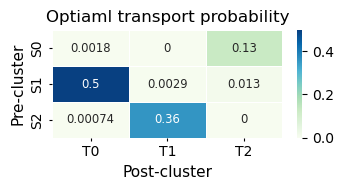

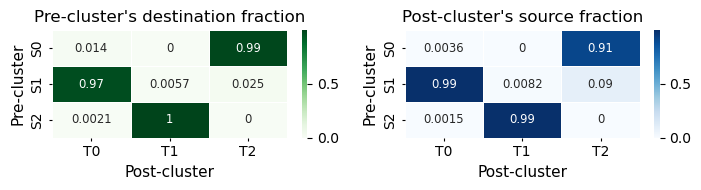

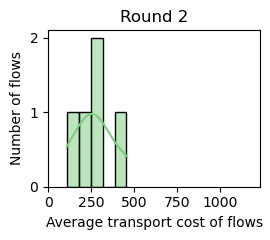

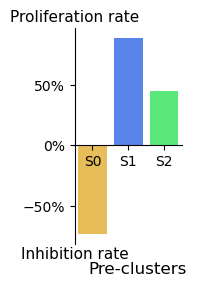

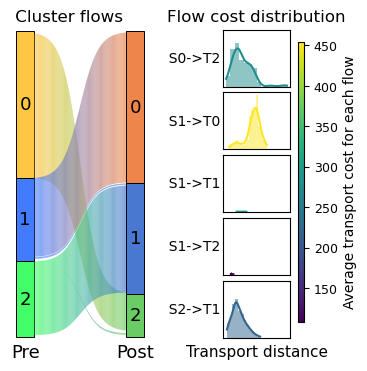

In [14]:
scd_obj.saveResults()

### 6. Perform factor analysis on the cell-level expression changes

This step will use the Bayesian factor analysis model to decompose the cell-level expression into static cluster-specific variations and dyanmic cluster-shared gene factors. This step will update the saved `scStateDynamics` object (`scd_object.pkl`) and save the decomposed results, including `FA-W.txt`, `FA-Z.txt`, `FA-U.txt`, and `FA-V.txt`.


## 5. Perform factor analysis on the cell-level expression changes ---------------------------
| - Saving figure: Simulation 1_ELBO_loss.png


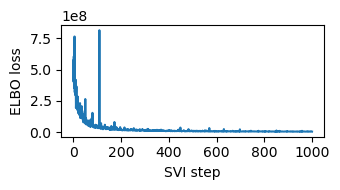

In [15]:
scd_obj.factorAnalysis(5, learningRate = 0.01, steps = 1000)

The decompsed results can also be accessed via the function `getFA_params()`.
* $Z$: Factor activities of cell-pairs.
* $W$: Gene weights of factors.
* $U$: Pre-cluster variation contributed to $\Delta X$.
* $V$: Post-cluster variation contributed to $\Delta X$.

In [16]:
scd_obj.getFA_params('W')    ## W, Z, U, V

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,...,Gene1991,Gene1992,Gene1993,Gene1994,Gene1995,Gene1996,Gene1997,Gene1998,Gene1999,Gene2000
Factor1,1.295814,0.182038,0.786693,0.488821,0.666218,0.738181,5.636909,0.235296,0.599397,0.460241,...,0.792051,0.471671,2.647417,3.141319,1.356559,0.216186,1.023207,1.002536,0.456922,1.270131
Factor2,0.749301,0.538337,0.717558,0.664158,0.325591,2.452014,1.229641,0.424319,12.488863,0.666104,...,0.446912,1.921309,1.120282,1.259135,0.515841,0.725081,0.540585,0.779742,1.228244,1.965145
Factor3,5.180037,0.316229,2.363076,1.393966,0.273664,0.832455,2.624093,0.923404,1.156550,1.063255,...,0.834219,0.484284,1.523058,0.311273,0.830835,0.205880,2.951278,2.608851,2.658597,0.672893
Factor4,0.762056,1.488070,0.593434,3.432678,0.570529,0.744231,0.819966,0.690893,2.976874,0.202069,...,0.536566,0.203413,1.461718,0.404379,0.125038,0.467231,2.612221,0.343100,0.931320,1.363350
Factor5,2.174031,2.721485,0.954951,1.182088,2.450727,0.518807,0.488238,0.210788,0.734551,0.695106,...,0.490620,0.609664,0.293697,0.833509,0.233030,3.446530,0.710014,0.503817,2.589986,2.497675
